In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import math

def evaluation_model(test, predict):
    num = test.shape[0]
    R2 = r2_score(test, predict)
    mse = mean_squared_error(test, predict)
    mae = mean_absolute_error(test, predict)
    rmse = math.sqrt(mse)
    mape = sum(abs((test-predict)/test))*100/num
    print("R2：", R2)
    print("mae:", mae)
    print("rmse:", rmse)
    print("mape", mape)
    
# 时间序列预处理
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [25]:
# 加载原始数据
data_1 = pd.read_csv('D:\\Jupyter Notebook\\Carbon Forecasting\\Final Project\\Data\\Preprocessing\\湖北.csv')
# 选取收盘价作为标签
label_1 = data_1['close']
label_1 = label_1.to_numpy(copy = True).reshape(-1, 1)
x1_forecast = series_to_supervised(label_1, 4, 1).to_numpy()
x1_forecast

array([[22.  , 24.2 , 26.62, 26.62, 29.25],
       [24.2 , 26.62, 26.62, 29.25, 27.  ],
       [26.62, 26.62, 29.25, 27.  , 26.  ],
       ...,
       [24.75, 24.76, 24.81, 24.87, 25.26],
       [24.76, 24.81, 24.87, 25.26, 25.1 ],
       [24.81, 24.87, 25.26, 25.1 , 25.11]])

In [26]:
# 划分训练集和测试集 划分输入和输出
# 数据x1_forecast
size1 = int((x1_forecast.shape[0]) * 0.8)  # 训练集数量占80%
train1 = x1_forecast[:size1, :]
test1 = x1_forecast[size1:, :]
train_X1, train_y1 = train1[:, :-1], train1[:, -1]
test_X1, test_y1 = test1[:, :-1], test1[:, -1]

In [30]:
from keras import activations
from tensorflow.keras import activations
from keras.layers import LSTM, Dense, Dropout, Bidirectional
from keras.models import Model, Sequential
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(4))
model.add(Dropout(0.2))
model.add(Dense(16))
model.add(Dropout(0.2))
model.add(Dense(8))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
model.fit(train_X1, train_y1, epochs=500, batch_size=128, verbose=2)  
test_predict = model.predict(test_X1)

Epoch 1/500
10/10 - 0s - loss: 43.1315
Epoch 2/500
10/10 - 0s - loss: 35.1127
Epoch 3/500
10/10 - 0s - loss: 28.1720
Epoch 4/500
10/10 - 0s - loss: 20.7843
Epoch 5/500
10/10 - 0s - loss: 14.6868
Epoch 6/500
10/10 - 0s - loss: 11.7959
Epoch 7/500
10/10 - 0s - loss: 10.0761
Epoch 8/500
10/10 - 0s - loss: 10.3746
Epoch 9/500
10/10 - 0s - loss: 9.5682
Epoch 10/500
10/10 - 0s - loss: 9.2639
Epoch 11/500
10/10 - 0s - loss: 9.0608
Epoch 12/500
10/10 - 0s - loss: 8.6809
Epoch 13/500
10/10 - 0s - loss: 8.1880
Epoch 14/500
10/10 - 0s - loss: 7.9350
Epoch 15/500
10/10 - 0s - loss: 7.9749
Epoch 16/500
10/10 - 0s - loss: 7.7989
Epoch 17/500
10/10 - 0s - loss: 7.9987
Epoch 18/500
10/10 - 0s - loss: 7.7256
Epoch 19/500
10/10 - 0s - loss: 7.3275
Epoch 20/500
10/10 - 0s - loss: 7.2627
Epoch 21/500
10/10 - 0s - loss: 7.0491
Epoch 22/500
10/10 - 0s - loss: 7.4613
Epoch 23/500
10/10 - 0s - loss: 7.1240
Epoch 24/500
10/10 - 0s - loss: 7.1789
Epoch 25/500
10/10 - 0s - loss: 6.8580
Epoch 26/500
10/10 - 0s - 

Epoch 209/500
10/10 - 0s - loss: 4.2635
Epoch 210/500
10/10 - 0s - loss: 4.3009
Epoch 211/500
10/10 - 0s - loss: 4.2372
Epoch 212/500
10/10 - 0s - loss: 4.1415
Epoch 213/500
10/10 - 0s - loss: 4.2578
Epoch 214/500
10/10 - 0s - loss: 4.2871
Epoch 215/500
10/10 - 0s - loss: 4.1991
Epoch 216/500
10/10 - 0s - loss: 4.4857
Epoch 217/500
10/10 - 0s - loss: 4.1410
Epoch 218/500
10/10 - 0s - loss: 4.2253
Epoch 219/500
10/10 - 0s - loss: 4.1758
Epoch 220/500
10/10 - 0s - loss: 4.1573
Epoch 221/500
10/10 - 0s - loss: 4.0838
Epoch 222/500
10/10 - 0s - loss: 4.0591
Epoch 223/500
10/10 - 0s - loss: 4.1615
Epoch 224/500
10/10 - 0s - loss: 4.3293
Epoch 225/500
10/10 - 0s - loss: 4.2588
Epoch 226/500
10/10 - 0s - loss: 4.1159
Epoch 227/500
10/10 - 0s - loss: 4.2355
Epoch 228/500
10/10 - 0s - loss: 4.1133
Epoch 229/500
10/10 - 0s - loss: 4.2170
Epoch 230/500
10/10 - 0s - loss: 4.1193
Epoch 231/500
10/10 - 0s - loss: 4.0355
Epoch 232/500
10/10 - 0s - loss: 4.1781
Epoch 233/500
10/10 - 0s - loss: 4.2141


Epoch 414/500
10/10 - 0s - loss: 3.4541
Epoch 415/500
10/10 - 0s - loss: 3.4052
Epoch 416/500
10/10 - 0s - loss: 3.3644
Epoch 417/500
10/10 - 0s - loss: 3.3075
Epoch 418/500
10/10 - 0s - loss: 3.4323
Epoch 419/500
10/10 - 0s - loss: 3.4479
Epoch 420/500
10/10 - 0s - loss: 3.4462
Epoch 421/500
10/10 - 0s - loss: 3.6361
Epoch 422/500
10/10 - 0s - loss: 3.4086
Epoch 423/500
10/10 - 0s - loss: 3.4589
Epoch 424/500
10/10 - 0s - loss: 3.3822
Epoch 425/500
10/10 - 0s - loss: 3.4659
Epoch 426/500
10/10 - 0s - loss: 3.2815
Epoch 427/500
10/10 - 0s - loss: 3.4896
Epoch 428/500
10/10 - 0s - loss: 3.3190
Epoch 429/500
10/10 - 0s - loss: 3.4758
Epoch 430/500
10/10 - 0s - loss: 3.3790
Epoch 431/500
10/10 - 0s - loss: 3.3904
Epoch 432/500
10/10 - 0s - loss: 3.3283
Epoch 433/500
10/10 - 0s - loss: 3.3013
Epoch 434/500
10/10 - 0s - loss: 3.3584
Epoch 435/500
10/10 - 0s - loss: 3.3868
Epoch 436/500
10/10 - 0s - loss: 3.2715
Epoch 437/500
10/10 - 0s - loss: 3.3650
Epoch 438/500
10/10 - 0s - loss: 3.3987


In [31]:
# 预测数据
np.save("D:\\Jupyter Notebook\\Carbon Forecasting\\Compare\\Data\\BP_Hubei.npy", test_predict)
# 计算误差
print('---------------------分割线-----------------------')
evaluation_model(test_y1.reshape(-1, 1), test_predict.reshape(-1, 1))
test_predict.shape

---------------------分割线-----------------------
R2： 0.5391638026176625
mae: 3.075893073583904
rmse: 3.676295866882691
mape [9.65937803]


(304, 1)

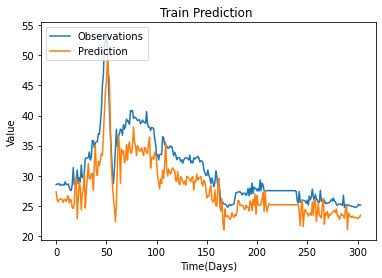

In [32]:
plt.figure()
plt.title("Train Prediction ")
plt.xlabel("Time(Days)")
plt.ylabel("Value")
plt.plot(test_y1, label="Observations")
plt.plot(test_predict, label="Prediction")
plt.legend(loc="upper left")

In [40]:
# 加载原始数据
data_1 = pd.read_csv('D:\\Jupyter Notebook\\Carbon Forecasting\\Final Project2\\Data\\Preprocessing\\上海.csv')
# 选取收盘价作为标签
label_1 = data_1['close']
label_1 = label_1.to_numpy(copy = True).reshape(-1, 1)
x1_forecast = series_to_supervised(label_1, 4, 1).to_numpy()
x1_forecast

array([[29.7 , 29.8 , 29.7 , 29.6 , 29.8 ],
       [29.8 , 29.7 , 29.6 , 29.8 , 29.7 ],
       [29.7 , 29.6 , 29.8 , 29.7 , 29.9 ],
       ...,
       [39.87, 38.59, 38.59, 38.59, 38.59],
       [38.59, 38.59, 38.59, 38.59, 38.59],
       [38.59, 38.59, 38.59, 38.59, 38.59]])

In [41]:
# 划分训练集和测试集 划分输入和输出
# 数据x1_forecast
size1 = int((x1_forecast.shape[0]) * 0.8)  # 训练集数量占80%
train1 = x1_forecast[:size1, :]
test1 = x1_forecast[size1:, :]
train_X1, train_y1 = train1[:, :-1], train1[:, -1]
test_X1, test_y1 = test1[:, :-1], test1[:, -1]

In [42]:
from keras import activations
from tensorflow.keras import activations
from keras.layers import LSTM, Dense, Dropout, Bidirectional
from keras.models import Model, Sequential
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(4))
model.add(Dropout(0.2))
model.add(Dense(16))
model.add(Dropout(0.2))
model.add(Dense(8))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
model.fit(train_X1, train_y1, epochs=500, batch_size=128, verbose=2)  
test_predict = model.predict(test_X1)

Epoch 1/500
10/10 - 0s - loss: 14.1462
Epoch 2/500
10/10 - 0s - loss: 12.8688
Epoch 3/500
10/10 - 0s - loss: 12.2677
Epoch 4/500
10/10 - 0s - loss: 11.7108
Epoch 5/500
10/10 - 0s - loss: 11.4836
Epoch 6/500
10/10 - 0s - loss: 10.7318
Epoch 7/500
10/10 - 0s - loss: 10.4286
Epoch 8/500
10/10 - 0s - loss: 10.0025
Epoch 9/500
10/10 - 0s - loss: 9.9003
Epoch 10/500
10/10 - 0s - loss: 9.5731
Epoch 11/500
10/10 - 0s - loss: 9.4184
Epoch 12/500
10/10 - 0s - loss: 8.9882
Epoch 13/500
10/10 - 0s - loss: 9.2133
Epoch 14/500
10/10 - 0s - loss: 9.2820
Epoch 15/500
10/10 - 0s - loss: 8.8899
Epoch 16/500
10/10 - 0s - loss: 8.6540
Epoch 17/500
10/10 - 0s - loss: 8.3926
Epoch 18/500
10/10 - 0s - loss: 8.4412
Epoch 19/500
10/10 - 0s - loss: 8.4591
Epoch 20/500
10/10 - 0s - loss: 8.4806
Epoch 21/500
10/10 - 0s - loss: 8.4113
Epoch 22/500
10/10 - 0s - loss: 8.1493
Epoch 23/500
10/10 - 0s - loss: 8.1956
Epoch 24/500
10/10 - 0s - loss: 8.2807
Epoch 25/500
10/10 - 0s - loss: 8.3854
Epoch 26/500
10/10 - 0s - 

Epoch 209/500
10/10 - 0s - loss: 6.0811
Epoch 210/500
10/10 - 0s - loss: 6.1095
Epoch 211/500
10/10 - 0s - loss: 6.1645
Epoch 212/500
10/10 - 0s - loss: 6.0247
Epoch 213/500
10/10 - 0s - loss: 6.1275
Epoch 214/500
10/10 - 0s - loss: 6.0414
Epoch 215/500
10/10 - 0s - loss: 5.9827
Epoch 216/500
10/10 - 0s - loss: 5.7765
Epoch 217/500
10/10 - 0s - loss: 5.8544
Epoch 218/500
10/10 - 0s - loss: 5.8106
Epoch 219/500
10/10 - 0s - loss: 5.8562
Epoch 220/500
10/10 - 0s - loss: 5.8952
Epoch 221/500
10/10 - 0s - loss: 5.9805
Epoch 222/500
10/10 - 0s - loss: 5.8620
Epoch 223/500
10/10 - 0s - loss: 5.8325
Epoch 224/500
10/10 - 0s - loss: 5.8911
Epoch 225/500
10/10 - 0s - loss: 6.0741
Epoch 226/500
10/10 - 0s - loss: 5.9677
Epoch 227/500
10/10 - 0s - loss: 6.0001
Epoch 228/500
10/10 - 0s - loss: 5.8617
Epoch 229/500
10/10 - 0s - loss: 5.8477
Epoch 230/500
10/10 - 0s - loss: 5.9056
Epoch 231/500
10/10 - 0s - loss: 6.0776
Epoch 232/500
10/10 - 0s - loss: 5.7355
Epoch 233/500
10/10 - 0s - loss: 5.8032


Epoch 414/500
10/10 - 0s - loss: 4.9780
Epoch 415/500
10/10 - 0s - loss: 5.2439
Epoch 416/500
10/10 - 0s - loss: 5.1211
Epoch 417/500
10/10 - 0s - loss: 5.1680
Epoch 418/500
10/10 - 0s - loss: 5.0987
Epoch 419/500
10/10 - 0s - loss: 5.2546
Epoch 420/500
10/10 - 0s - loss: 5.3020
Epoch 421/500
10/10 - 0s - loss: 5.2327
Epoch 422/500
10/10 - 0s - loss: 5.1637
Epoch 423/500
10/10 - 0s - loss: 5.1076
Epoch 424/500
10/10 - 0s - loss: 5.0651
Epoch 425/500
10/10 - 0s - loss: 5.2844
Epoch 426/500
10/10 - 0s - loss: 5.1962
Epoch 427/500
10/10 - 0s - loss: 5.2294
Epoch 428/500
10/10 - 0s - loss: 5.1060
Epoch 429/500
10/10 - 0s - loss: 5.2727
Epoch 430/500
10/10 - 0s - loss: 5.2023
Epoch 431/500
10/10 - 0s - loss: 5.1382
Epoch 432/500
10/10 - 0s - loss: 5.2093
Epoch 433/500
10/10 - 0s - loss: 5.0735
Epoch 434/500
10/10 - 0s - loss: 4.9033
Epoch 435/500
10/10 - 0s - loss: 5.0735
Epoch 436/500
10/10 - 0s - loss: 5.0398
Epoch 437/500
10/10 - 0s - loss: 4.9979
Epoch 438/500
10/10 - 0s - loss: 4.7904


In [47]:
# 预测数据
np.save("D:\\Jupyter Notebook\\Carbon Forecasting\\Compare\\Data\\BP_Shanghai.npy", test_predict)
# 计算误差
print('---------------------分割线-----------------------')
evaluation_model(test_y1.reshape(-1, 1), test_predict.reshape(-1, 1))
test_predict.shape

---------------------分割线-----------------------
R2： -0.46446497028303124
mae: 3.17552003180567
rmse: 3.7126261436000987
mape [7.6177266]


(317, 1)

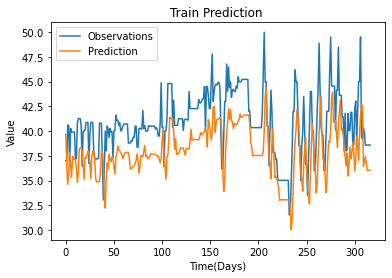

In [48]:
plt.figure()
plt.title("Train Prediction ")
plt.xlabel("Time(Days)")
plt.ylabel("Value")
plt.plot(test_y1, label="Observations")
plt.plot(test_predict, label="Prediction")
plt.legend(loc="upper left")